# Sentiment con dataset kaggle

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("kr_ticker-sentiment.csv")
df

,Unnamed: 0,Close,High,Low,Open,Volume,Sentiment_mean,Sentiment_sum,Sentiment_count
0,2010-02-04,7.943453,8.123644,7.932191,8.037303,21101000.0,0.140531,0.140531,1.0
1,2010-02-05,7.950959,8.018531,7.883387,7.939696,15802000.0,0.000000,0.000000,0.0
2,2010-02-06,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.0
3,2010-02-07,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.0
4,2010-02-08,7.932190,7.999762,7.864619,7.947207,12450600.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
3769,2020-05-31,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.0
3770,2020-06-01,29.333851,29.992937,29.279678,29.532477,6933400.0,0.000000,0.000000,0.0
3771,2020-06-02,29.794306,29.794306,29.171335,29.243562,6764100.0,0.000000,0.000000,0.0
3772,2020-06-03,29.505388,30.101274,29.297731,29.803329,6579500.0,0.000000,0.000000,0.0


In [8]:
trunc_df = df[['Unnamed: 0','Close']]
trunc_df = trunc_df.set_index(['Unnamed: 0'])
trunc_df.index.name = 'date'
trunc_df

,Close
date,
2010-02-04,7.943453
2010-02-05,7.950959
2010-02-06,NaN
2010-02-07,NaN
2010-02-08,7.932190
...,...
2020-05-31,NaN
2020-06-01,29.333851
2020-06-02,29.794306


In [12]:
sentiment_df = pd.read_csv("kggl_sentiment_day_KR.csv")
sentiment_df

,date,mean,sum,count
0,2009-09-15,-0.354557,-0.709113,2
1,2009-09-22,0.000816,0.000816,1
2,2009-11-04,0.918252,0.918252,1
3,2009-11-10,-0.007526,-0.015051,2
4,2009-11-21,0.003646,0.003646,1
...,...,...,...,...
1976,2020-05-29,-0.446725,-0.893451,2
1977,2020-06-04,-0.000646,-0.001291,2
1978,2020-06-06,-0.012368,-0.012368,1
1979,2020-06-08,0.161289,0.161289,1


In [13]:
sentiment_df = sentiment_df.set_index(['date'])
sentiment_df

,mean,sum,count
date,,,
2009-09-15,-0.354557,-0.709113,2
2009-09-22,0.000816,0.000816,1
2009-11-04,0.918252,0.918252,1
2009-11-10,-0.007526,-0.015051,2
2009-11-21,0.003646,0.003646,1
...,...,...,...
2020-05-29,-0.446725,-0.893451,2
2020-06-04,-0.000646,-0.001291,2
2020-06-06,-0.012368,-0.012368,1


In [14]:
lags = 2
for i in range(lags):
    n1 = f"mean-{i+1}"
    n2 = f"sum-{i+1}"
    n3 = f"count-{i+1}"
    sentiment_df[n1] = sentiment_df['mean'].shift(i+1)
    sentiment_df[n2] = sentiment_df['sum'].shift(i+1)
    sentiment_df[n3] = sentiment_df['count'].shift(i+1)
    
sentiment_df

,mean,sum,count,mean-1,sum-1,count-1,mean-2,sum-2,count-2
date,,,,,,,,,
2009-09-15,-0.354557,-0.709113,2,NaN,NaN,NaN,NaN,NaN,NaN
2009-09-22,0.000816,0.000816,1,-0.354557,-0.709113,2.0,NaN,NaN,NaN
2009-11-04,0.918252,0.918252,1,0.000816,0.000816,1.0,-0.354557,-0.709113,2.0
2009-11-10,-0.007526,-0.015051,2,0.918252,0.918252,1.0,0.000816,0.000816,1.0
2009-11-21,0.003646,0.003646,1,-0.007526,-0.015051,2.0,0.918252,0.918252,1.0
...,...,...,...,...,...,...,...,...,...
2020-05-29,-0.446725,-0.893451,2,0.466625,2.333127,5.0,0.930558,0.930558,1.0
2020-06-04,-0.000646,-0.001291,2,-0.446725,-0.893451,2.0,0.466625,2.333127,5.0
2020-06-06,-0.012368,-0.012368,1,-0.000646,-0.001291,2.0,-0.446725,-0.893451,2.0


In [17]:
#Introducing dat of the week variable
close_df = trunc_df
close_df.index = pd.to_datetime(trunc_df.index)
close_df['week_day'] = trunc_df.index.dayofweek
close_df

,Close,week_day
date,,
2010-02-04,7.943453,3
2010-02-05,7.950959,4
2010-02-06,NaN,5
2010-02-07,NaN,6
2010-02-08,7.932190,0
...,...,...
2020-05-31,NaN,6
2020-06-01,29.333851,0
2020-06-02,29.794306,1


In [27]:
#Completing sentiment dataframe
date_range = pd.date_range(start=sentiment_df.index.min(), end=sentiment_df.index.max(), freq='D')
sentiment_df.index = pd.to_datetime(sentiment_df.index)
sentiment_df_full = sentiment_df.reindex(date_range)
sentiment_df_full = sentiment_df_full.fillna(0)
sentiment_df_full

,mean,sum,count,mean-1,sum-1,count-1,mean-2,sum-2,count-2
2009-09-15,-0.354557,-0.709113,2.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
2009-09-16,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
2009-09-17,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
2009-09-18,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
2009-09-19,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
2020-06-07,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
2020-06-08,0.161289,0.161289,1.0,-0.012368,-0.012368,1.0,-0.000646,-0.001291,2.0
2020-06-09,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
2020-06-10,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0


In [29]:
df_merge = pd.merge(close_df, sentiment_df_full, left_index=True, right_index=True, how='left')
df_merge

,Close,week_day,mean,sum,count,mean-1,sum-1,count-1,mean-2,sum-2,count-2
date,,,,,,,,,,,
2010-02-04,7.943453,3,0.140531,0.140531,1.0,0.254928,0.254928,1.0,0.057407,0.057407,1.0
2010-02-05,7.950959,4,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
2010-02-06,NaN,5,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
2010-02-07,NaN,6,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
2010-02-08,7.932190,0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2020-05-31,NaN,6,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
2020-06-01,29.333851,0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
2020-06-02,29.794306,1,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0


<Axes: xlabel='date'>

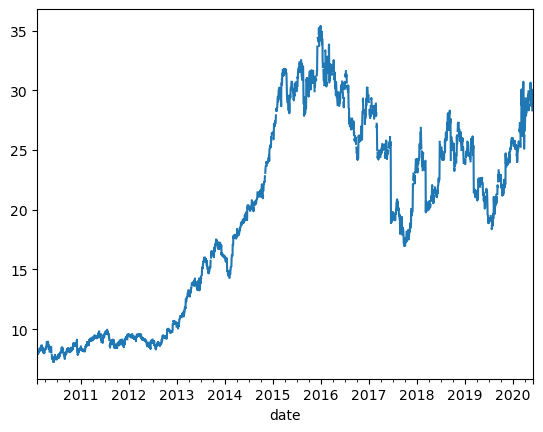

In [30]:
df_merge['Close'].plot()

In [34]:
df_merge['last_close'] = df_merge['Close'].shift(1)

In [ ]:
X = df_merge[['last_close', 'week_day', 'mean', 'sum', 'count', 'mean-1', 'sum-1',
       'count-1', 'mean-2', 'sum-2', 'count-2']].dropna().astype(float)
y = df_merge[['Close']].dropna().astype(float)

,last_close,week_day,mean,sum,count,mean-1,sum-1,count-1,mean-2,sum-2,count-2
date,,,,,,,,,,,
2010-02-05,7.943453,4.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
2010-02-06,7.950959,5.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
2010-02-09,7.932190,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
2010-02-10,8.022285,2.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
2010-02-11,8.005315,3.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2020-05-29,28.945621,4.0,-0.446725,-0.893451,2.0,0.466625,2.333127,5.0,0.930558,0.930558,1.0
2020-05-30,29.451220,5.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
2020-06-02,29.333851,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0


In [38]:
split_index = int(len(X) * 0.8)
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

In [40]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [41]:
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [49]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")
rmse = np.sqrt(mse)
print(f"RMSE: {rmse:.4f}")

Mean Squared Error: 0.0069
RMSE: 0.0830


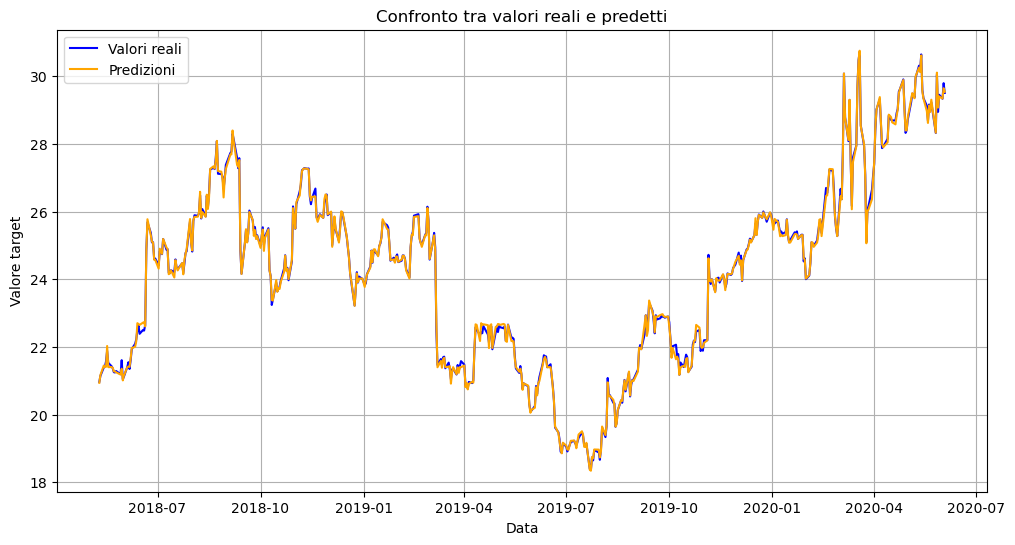

In [44]:
import matplotlib.pyplot as plt

y_pred = pd.Series(y_pred, index=y_test.index)

plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Valori reali', color='blue')
plt.plot(y_test.index, y_pred, label='Predizioni', color='orange')
plt.xlabel('Data')
plt.ylabel('Valore target')
plt.title('Confronto tra valori reali e predetti')
plt.legend()
plt.grid(True)
plt.show()

# Confronto con modello senza Sentiment

In [45]:
X_train_light = X_train[['last_close', 'week_day']]
X_test_light = X_test[['last_close', 'week_day']]

model_light = xgb.XGBRegressor()
model_light.fit(X_train_light, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [48]:
y_pred_light = model_light.predict(X_test_light)
mse = mean_squared_error(y_test, y_pred_light)
print(f"Mean Squared Error: {mse:.4f}")
rmse = np.sqrt(mse)
print(f"RMSE: {rmse:.4f}")

Mean Squared Error: 0.0045
RMSE: 0.0669


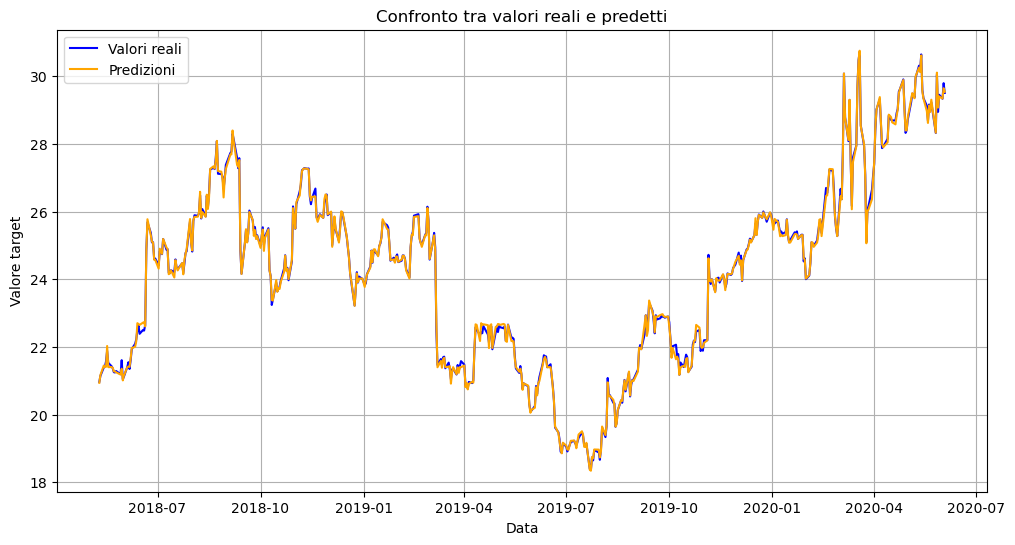

In [47]:
import matplotlib.pyplot as plt

y_pred_light = pd.Series(y_pred, index=y_test.index)

plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Valori reali', color='blue')
plt.plot(y_test.index, y_pred_light, label='Predizioni', color='orange')
plt.xlabel('Data')
plt.ylabel('Valore target')
plt.title('Confronto tra valori reali e predetti')
plt.legend()
plt.grid(True)
plt.show()

# Analisi delle features

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("kr_ticker-sentiment_smLag3.csv")
df

,date,Close,High,Low,Open,Volume,Sentiment_mean,Sentiment_sum,Sentiment_count,Sentiment_count-3,Sentiment_sum-3,Sentiment_mean-3
0,2010-02-04,7.943453,8.123644,7.932191,8.037303,21101000.0,0.140531,0.140531,1.0,NaN,NaN,NaN
1,2010-02-05,7.950959,8.018531,7.883387,7.939696,15802000.0,0.000000,0.000000,0.0,NaN,NaN,NaN
2,2010-02-06,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.0,1.0,0.140531,0.140531
3,2010-02-07,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0,0.000000,NaN
4,2010-02-08,7.932190,7.999762,7.864619,7.947207,12450600.0,0.000000,0.000000,0.0,0.0,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3769,2020-05-31,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.0,2.0,-0.893451,-0.446725
3770,2020-06-01,29.333851,29.992937,29.279678,29.532477,6933400.0,0.000000,0.000000,0.0,0.0,0.000000,NaN
3771,2020-06-02,29.794306,29.794306,29.171335,29.243562,6764100.0,0.000000,0.000000,0.0,0.0,0.000000,NaN
3772,2020-06-03,29.505388,30.101274,29.297731,29.803329,6579500.0,0.000000,0.000000,0.0,0.0,0.000000,NaN


In [ ]:
# cleaning the dataset
df = df.set_index(['date'])

KeyError: "None of ['date'] are in the columns"

In [6]:
df = df[['Close', 'Sentiment_mean', 'Sentiment_sum', 'Sentiment_count']]

In [8]:
df.fillna(method='ffill', inplace=True)
df

C:\Users\user\AppData\Local\Temp\ipykernel_1300\3303779087.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(method='ffill', inplace=True)


,Close,Sentiment_mean,Sentiment_sum,Sentiment_count
date,,,,
2010-02-04,7.943453,0.140531,0.140531,1.0
2010-02-05,7.950959,0.000000,0.000000,0.0
2010-02-06,7.950959,0.000000,0.000000,0.0
2010-02-07,7.950959,0.000000,0.000000,0.0
2010-02-08,7.932190,0.000000,0.000000,0.0
...,...,...,...,...
2020-05-31,29.451220,0.000000,0.000000,0.0
2020-06-01,29.333851,0.000000,0.000000,0.0
2020-06-02,29.794306,0.000000,0.000000,0.0


In [10]:
df.index = pd.to_datetime(df.index)
df['week_day'] = df.index.day_name()
df

C:\Users\user\AppData\Local\Temp\ipykernel_1300\2153172286.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['week_day'] = df.index.day_name()


,Close,Sentiment_mean,Sentiment_sum,Sentiment_count,week_day
date,,,,,
2010-02-04,7.943453,0.140531,0.140531,1.0,Thursday
2010-02-05,7.950959,0.000000,0.000000,0.0,Friday
2010-02-06,7.950959,0.000000,0.000000,0.0,Saturday
2010-02-07,7.950959,0.000000,0.000000,0.0,Sunday
2010-02-08,7.932190,0.000000,0.000000,0.0,Monday
...,...,...,...,...,...
2020-05-31,29.451220,0.000000,0.000000,0.0,Sunday
2020-06-01,29.333851,0.000000,0.000000,0.0,Monday
2020-06-02,29.794306,0.000000,0.000000,0.0,Tuesday


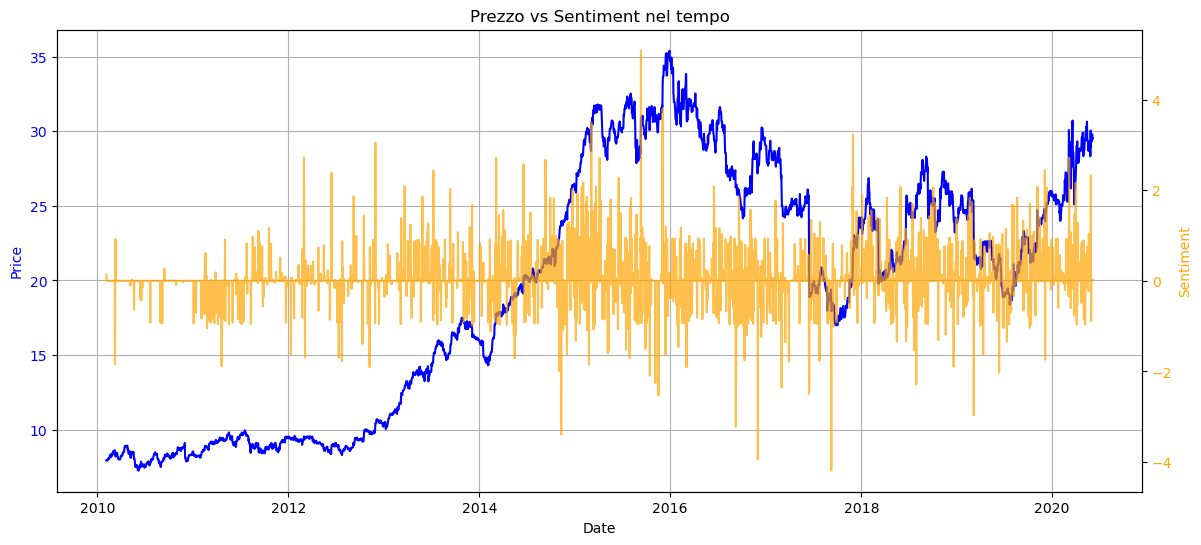

In [11]:
plt.figure(figsize=(14, 6))

# Asse principale: Prezzo
ax1 = plt.gca()
ax1.plot(df.index, df['Close'], color='blue', label='Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Secondo asse Y: Sentiment
ax2 = ax1.twinx()
ax2.plot(df.index, df['Sentiment_sum'], color='orange', label='Sentiment', alpha=0.7)
ax2.set_ylabel('Sentiment', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Titolo e griglia
plt.title('Prezzo vs Sentiment nel tempo')
ax1.grid(True)
plt.show()

In [ ]:
df['Sentiment_sum_MA10'] = df['Sentiment_sum'].rolling(window=10).mean()
df

C:\Users\user\AppData\Local\Temp\ipykernel_1300\3894437162.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sentiment_sum_MA10'] = df['Sentiment_sum'].rolling(window=10).mean()


,Close,Sentiment_mean,Sentiment_sum,Sentiment_count,week_day,Sentiment_sum_MA10
date,,,,,,
2010-02-04,7.943453,0.140531,0.140531,1.0,Thursday,NaN
2010-02-05,7.950959,0.000000,0.000000,0.0,Friday,NaN
2010-02-06,7.950959,0.000000,0.000000,0.0,Saturday,NaN
2010-02-07,7.950959,0.000000,0.000000,0.0,Sunday,NaN
2010-02-08,7.932190,0.000000,0.000000,0.0,Monday,NaN
...,...,...,...,...,...,...
2020-05-31,29.451220,0.000000,0.000000,0.0,Sunday,0.143968
2020-06-01,29.333851,0.000000,0.000000,0.0,Monday,0.143968
2020-06-02,29.794306,0.000000,0.000000,0.0,Tuesday,0.143968


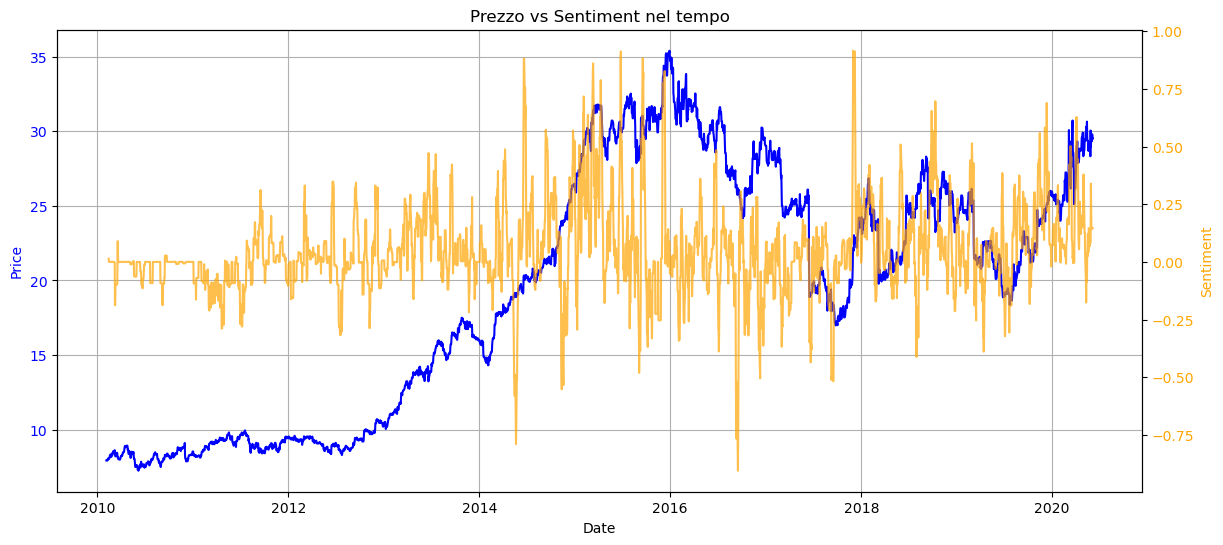

In [15]:
plt.figure(figsize=(14, 6))

# Asse principale: Prezzo
ax1 = plt.gca()
ax1.plot(df.index, df['Close'], color='blue', label='Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Secondo asse Y: Sentiment MA
ax2 = ax1.twinx()
ax2.plot(df.index, df['Sentiment_sum_MA10'], color='orange', label='Sentiment', alpha=0.7)
ax2.set_ylabel('Sentiment', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Titolo e griglia
plt.title('Prezzo vs Sentiment nel tempo')
ax1.grid(True)
plt.show()